In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_excel('Decision Tree & Random Forest Problem_ Data Set.xlsx')  

In [3]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [8]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<AxesSubplot:xlabel='purpose', ylabel='count'>

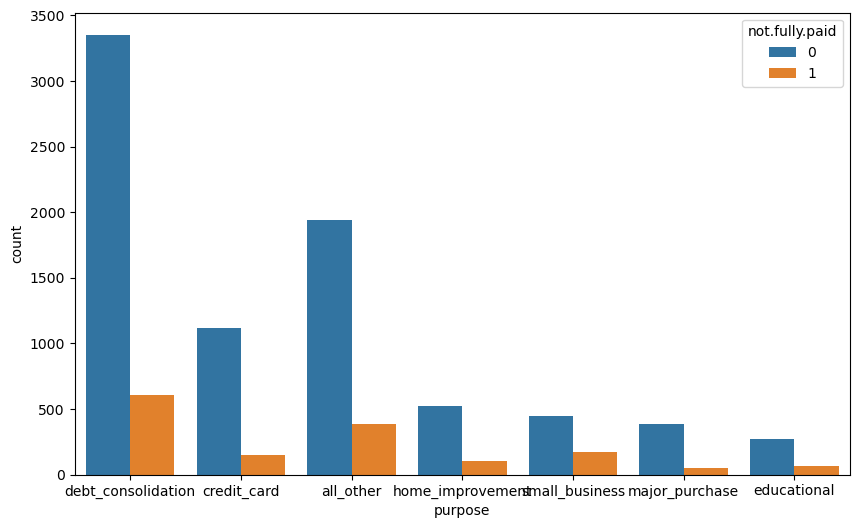

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['purpose'],hue=df['not.fully.paid'])

<AxesSubplot:xlabel='fico', ylabel='Count'>

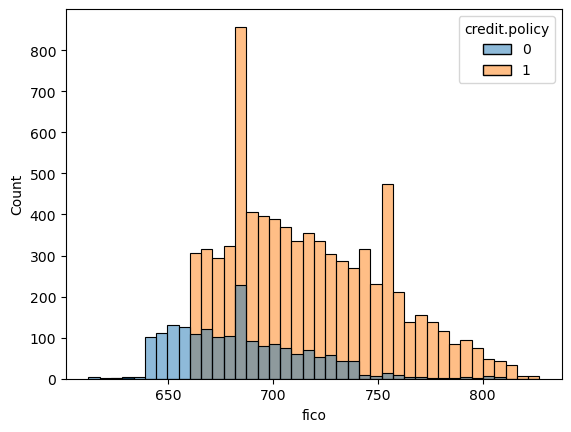

In [11]:
sns.histplot(x="fico", data=df, hue="credit.policy", bins=40)

<AxesSubplot:xlabel='fico', ylabel='Count'>

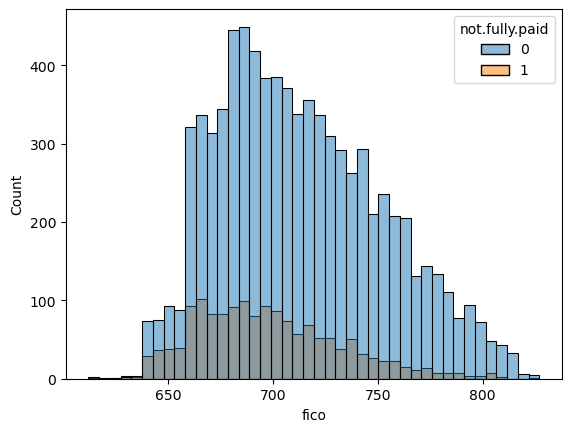

In [12]:
sns.histplot(x="fico", data=df, hue="not.fully.paid")

## Data Standardization

In [13]:
loan_data = pd.get_dummies(data=df,columns=['purpose'],drop_first=True)
loan_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = loan_data.drop('not.fully.paid',axis=1)
y =loan_data['not.fully.paid']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Decision Tree Model

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
prediction = dtree.predict(X_test)

In [20]:
pd.DataFrame({'label':y_test,'Predictions':prediction})

,label,Predictions
5244,0,0
1739,0,1
2780,0,0
7062,0,1
6661,0,0
...,...,...
9508,0,0
4348,0,1
4233,0,0
5363,0,0


In [21]:
dtree.score(X_test,y_test)

0.7310368823938761

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
confusion_matrix(y_test,prediction)

array([[2002,  429],
       [ 344,   99]], dtype=int64)

In [24]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[Text(0.37895651076167475, 0.9821428571428571, 'X[0] <= 0.5\ngini = 0.272\nsamples = 6704\nvalue = [5614, 1090]'),
 Text(0.17602738105637084, 0.9464285714285714, 'X[2] <= 349.935\ngini = 0.408\nsamples = 1317\nvalue = [941, 376]'),
 Text(0.13548612324326423, 0.9107142857142857, 'X[9] <= 6.5\ngini = 0.378\nsamples = 943\nvalue = [704, 239]'),
 Text(0.10139386307166705, 0.875, 'X[1] <= 0.084\ngini = 0.36\nsamples = 815\nvalue = [623, 192]'),
 Text(0.1001515305924373, 0.8392857142857143, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.10263619555089681, 0.8392857142857143, 'X[17] <= 0.5\ngini = 0.368\nsamples = 789\nvalue = [597, 192]'),
 Text(0.0662864449879649, 0.8035714285714286, 'X[8] <= 50.95\ngini = 0.362\nsamples = 768\nvalue = [586, 182]'),
 Text(0.01919791909309729, 0.7678571428571429, 'X[8] <= 1.35\ngini = 0.313\nsamples = 329\nvalue = [265, 64]'),
 Text(0.007453994875378523, 0.7321428571428571, 'X[4] <= 6.54\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(0.00496932

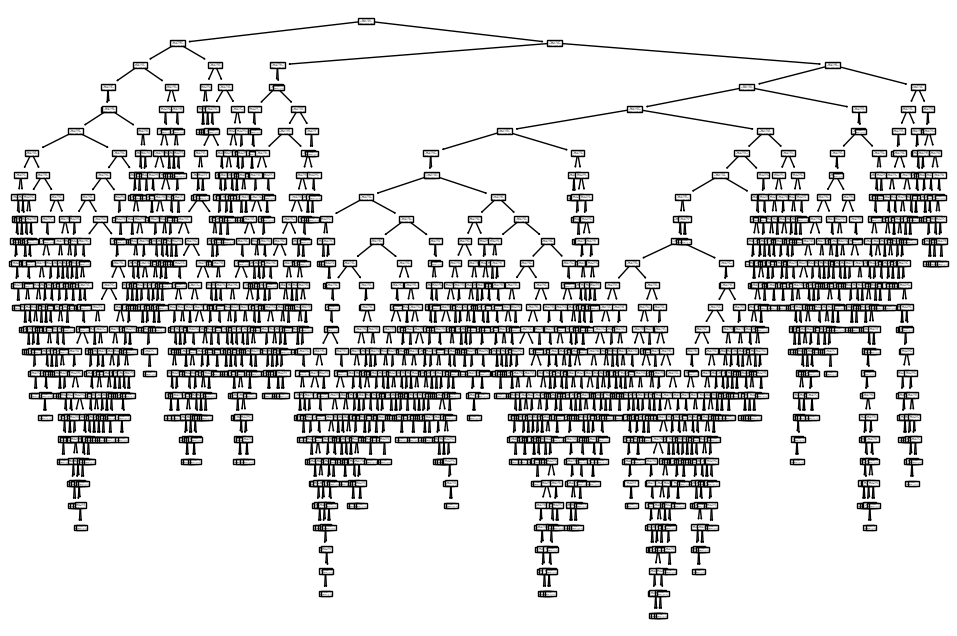

In [25]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(dtree.fit(X_train,y_train)) 

[Text(0.3663331292500589, 0.9857142857142858, 'X[0] <= 0.5\ngini = 0.261\nsamples = 2874\nvalue = [2431, 443]'),
 Text(0.1914432692811142, 0.9571428571428572, 'X[9] <= 13.5\ngini = 0.384\nsamples = 551\nvalue = [408, 143]'),
 Text(0.18474134771454004, 0.9285714285714286, 'X[5] <= 639.5\ngini = 0.375\nsamples = 541\nvalue = [406, 135]'),
 Text(0.18139038693125295, 0.9, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.1880923084978271, 0.9, 'X[9] <= 5.5\ngini = 0.367\nsamples = 536\nvalue = [406, 130]'),
 Text(0.09507042253521127, 0.8714285714285714, 'X[3] <= 9.933\ngini = 0.336\nsamples = 421\nvalue = [331, 90]'),
 Text(0.04136342216869993, 0.8428571428571429, 'X[4] <= 15.925\ngini = 0.482\nsamples = 37\nvalue = [22, 15]'),
 Text(0.03298602021048223, 0.8142857142857143, 'X[3] <= 9.891\ngini = 0.408\nsamples = 28\nvalue = [20, 8]'),
 Text(0.026284098643908058, 0.7857142857142857, 'X[5] <= 754.5\ngini = 0.208\nsamples = 17\nvalue = [15, 2]'),
 Text(0.022933137860620977, 0.7571428571428

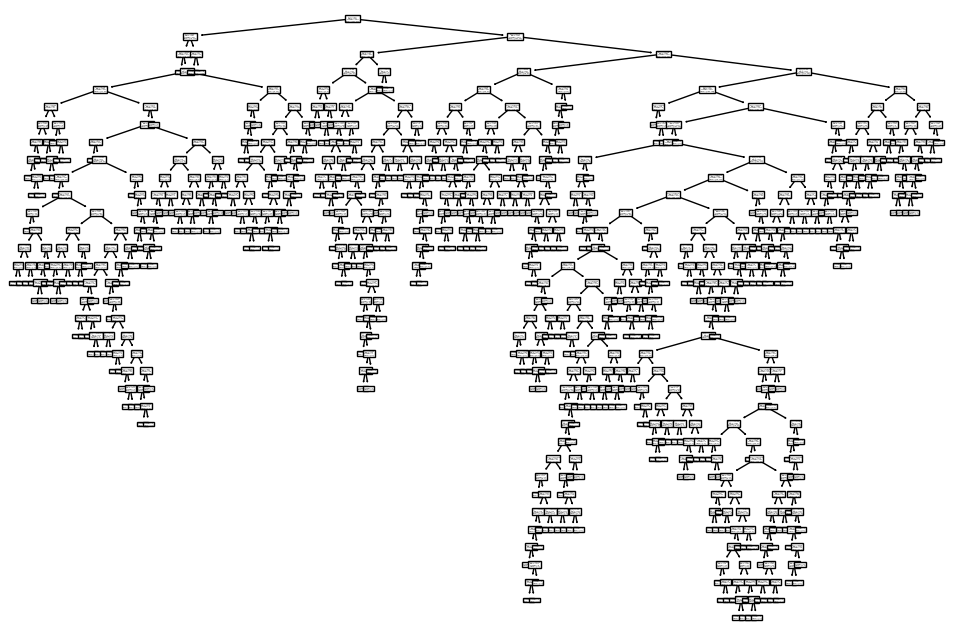

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(dtree.fit(X_test,y_test)) 

## Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(random_state=101, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=101)

In [29]:
prediction = rf.predict(X_test)

In [30]:
pd.DataFrame({'Label':y_test,'Predictions':prediction})

,Label,Predictions
5244,0,0
1739,0,0
2780,0,0
7062,0,0
6661,0,0
...,...,...
9508,0,0
4348,0,0
4233,0,0
5363,0,0


In [31]:
rf.score(X_test,y_test)

0.8455114822546973

In [32]:
confusion_matrix(y_test,prediction)

array([[2430,    1],
       [ 443,    0]], dtype=int64)

In [33]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874

